# Haseeb Muhammad (413927) BSCS 12 A


In [20]:
import os
from SpectralClusteringGraph import SpectralClusteringGraph
import numpy as np
import matplotlib.pyplot as plt

In [21]:
central_nodes = [0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]

In [22]:
results = []

# Visulaizing the gaphs and Eigen Gap Heuristics

Largest Eigen Gap for Central Node 0: is at index 63


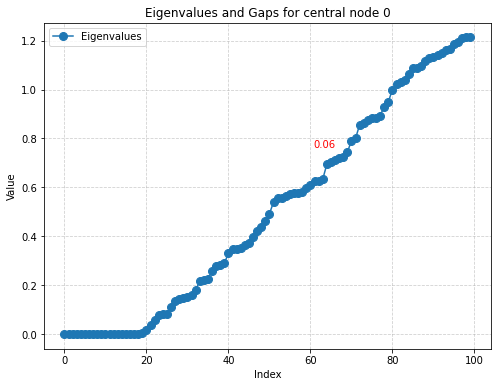

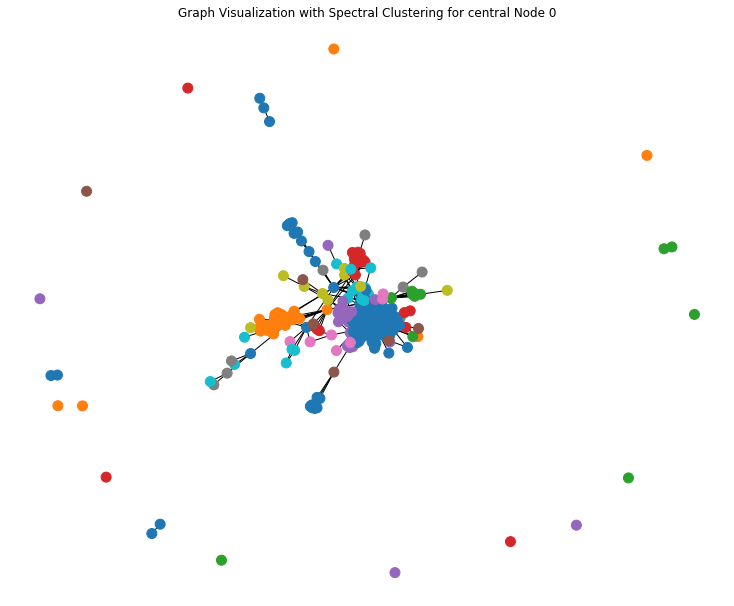

Largest Eigen Gap for Central Node 107: is at index 40


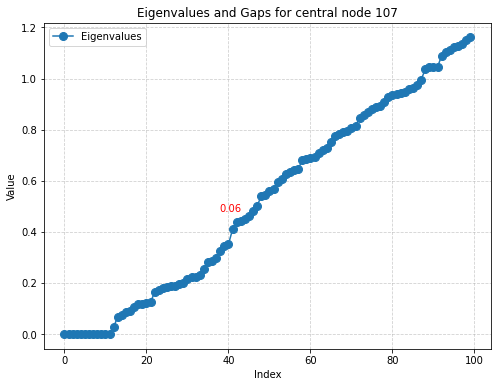

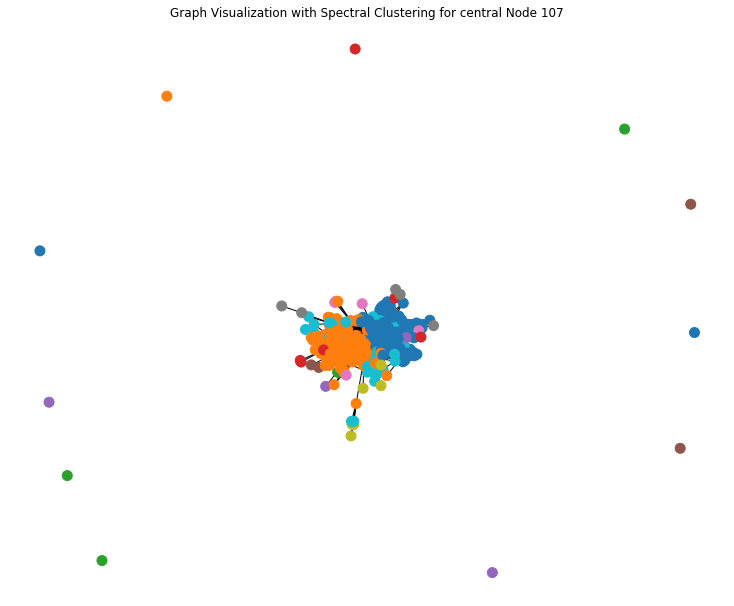

Largest Eigen Gap for Central Node 348: is at index 75


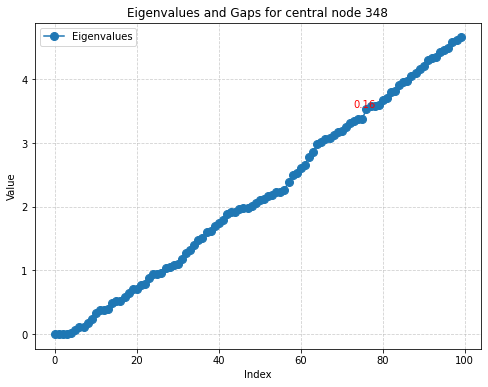

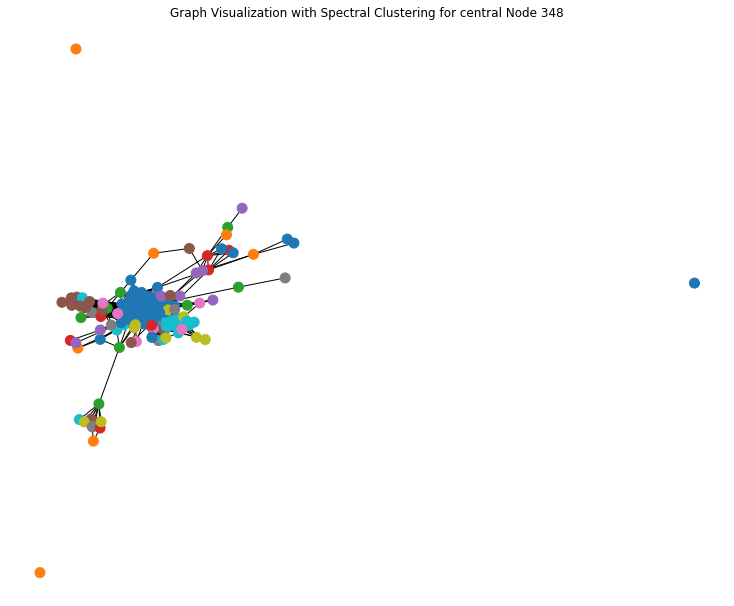

Largest Eigen Gap for Central Node 414: is at index 38


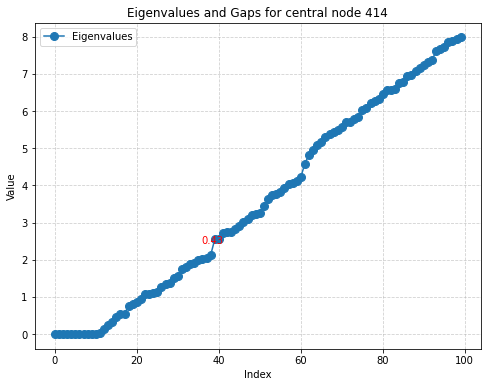

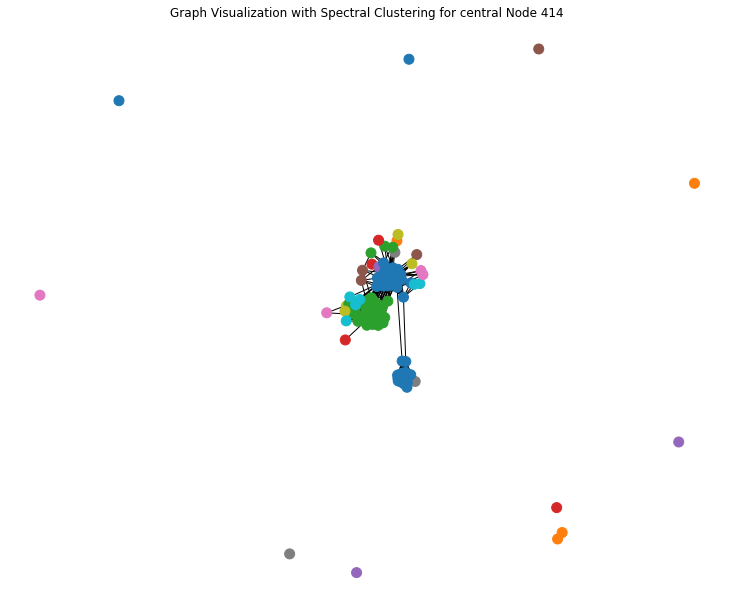

Largest Eigen Gap for Central Node 686: is at index 17


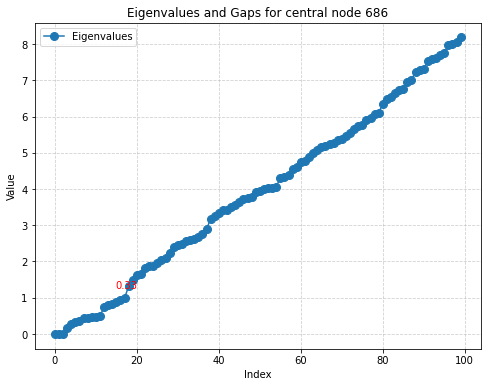

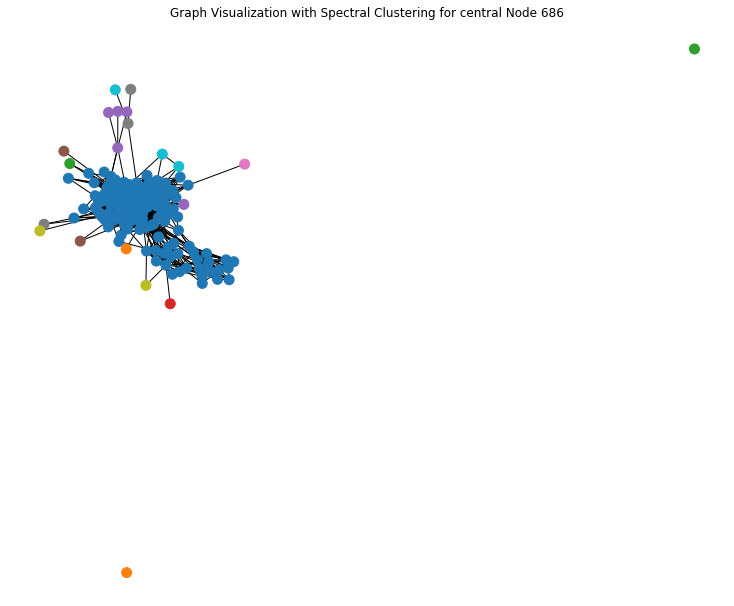

Largest Eigen Gap for Central Node 698: is at index 54


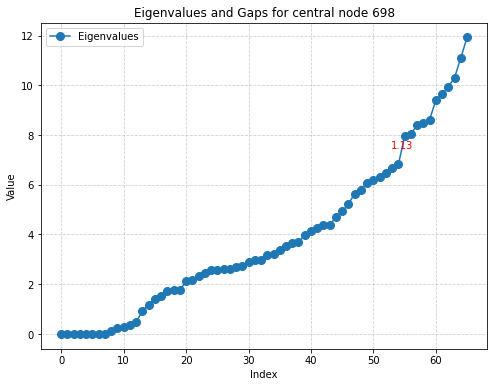

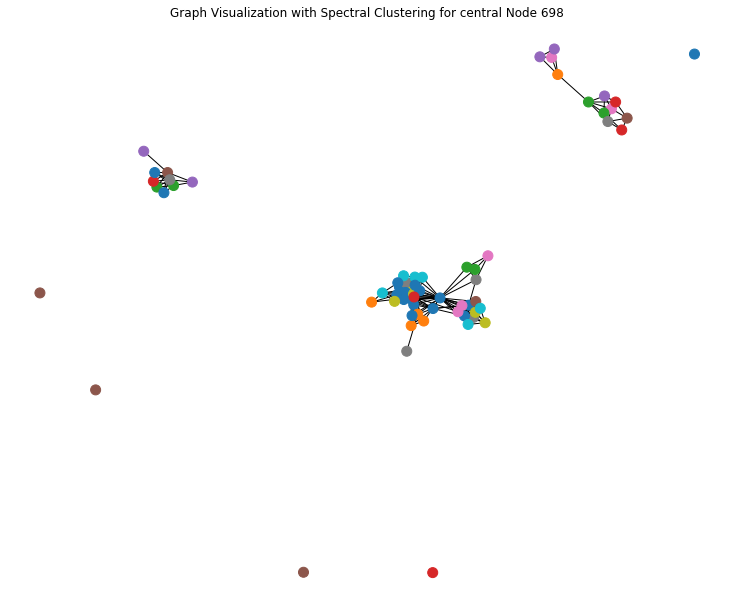

Largest Eigen Gap for Central Node 1684: is at index 81


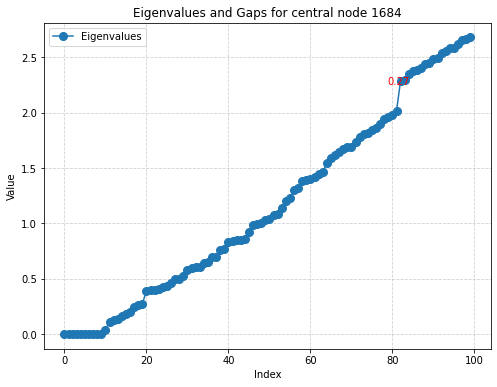

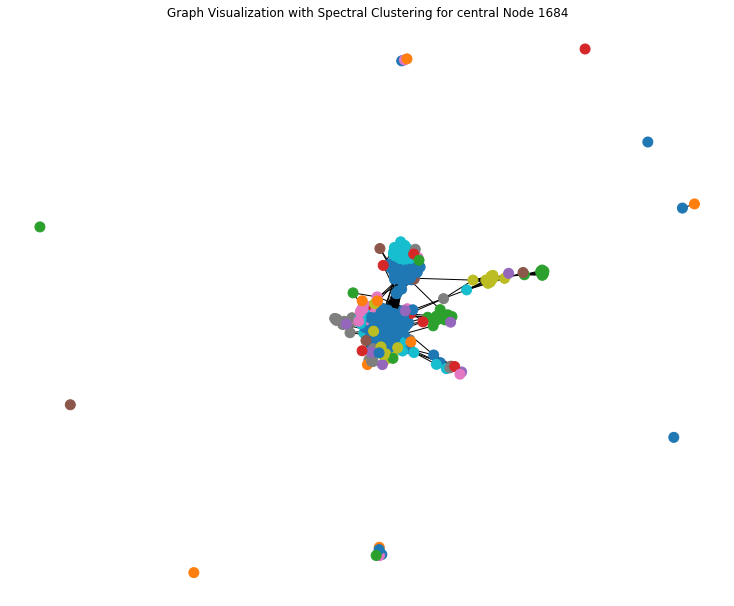

Largest Eigen Gap for Central Node 1912: is at index 75


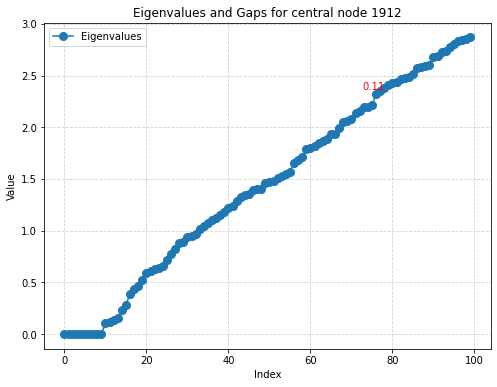

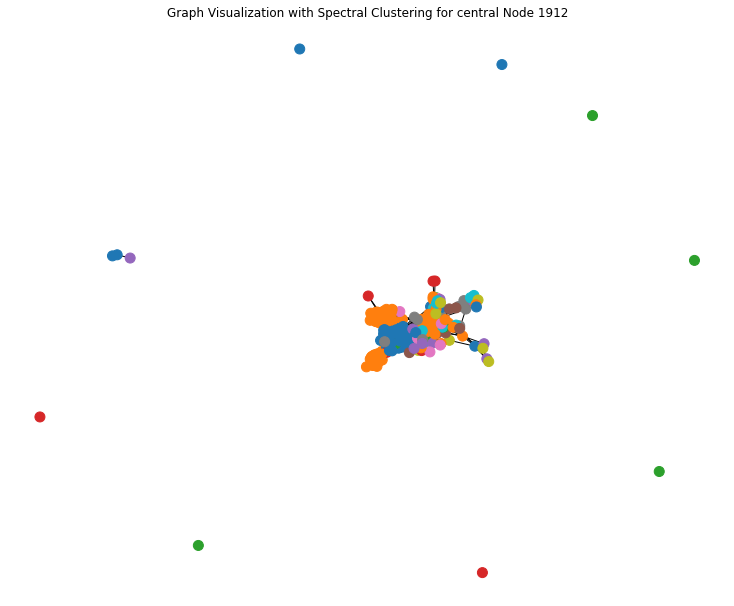

Largest Eigen Gap for Central Node 3437: is at index 36


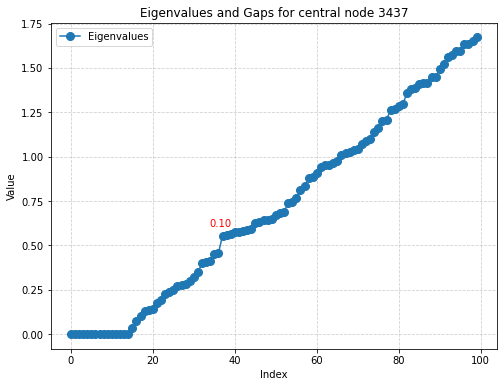

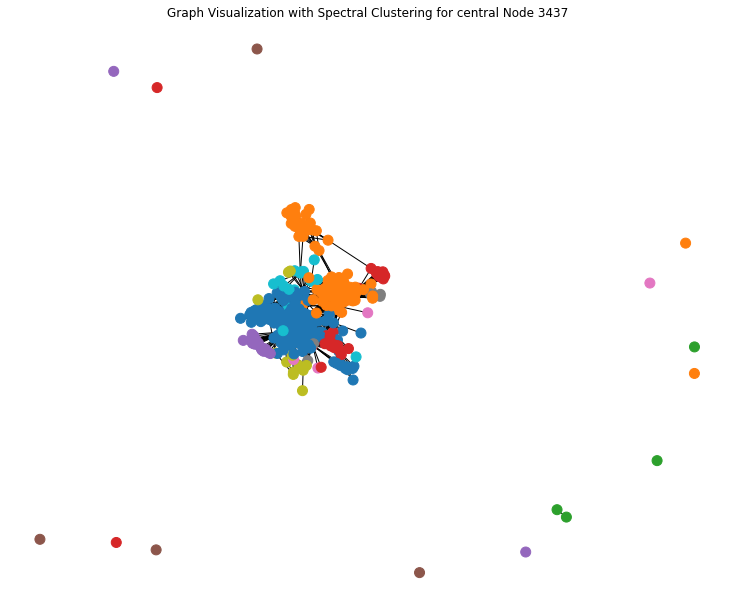

Largest Eigen Gap for Central Node 3980: is at index 56


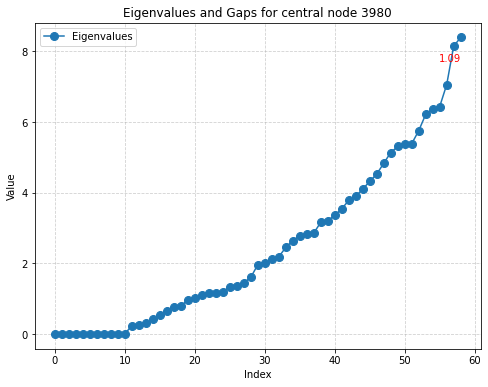

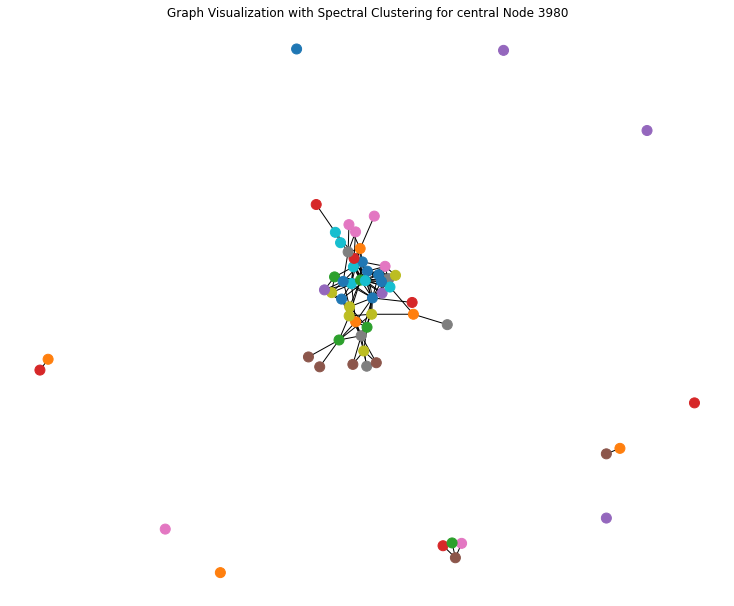

In [23]:
for central_node in central_nodes:
    cwd = os.getcwd()

    # Initialize graph object
    graph = SpectralClusteringGraph(central_node, sigma=0.1)

    # Load data
    edges_path = os.path.join(cwd, "dataset", f"{central_node}.edges")
    features_path = os.path.join(cwd, "dataset", f"{central_node}.feat")
    ground_truth_path = os.path.join(cwd, "dataset", f"{central_node}.circles")

    graph.read_edges(edges_path)
    graph.read_features(features_path)

    # Map node IDs to indices
    graph.node_mapping = {node: idx for idx, node in enumerate(graph.features.keys())}

    # Perform clustering steps
    graph.create_weighted_adjacency_matrix()
    graph.create_degree_matrix()
    graph.create_laplacian_matrix()
    graph.analyze_laplacian()
    graph.perform_clustering()
    graph.build_and_visualize_graph()

    # Evaluate clustering
    evaluation_results = graph.evaluate_clustering(ground_truth_path)
    results.append({"central_node":central_node, "evaluation_results" : evaluation_results})


# Visualizing Numerical Results

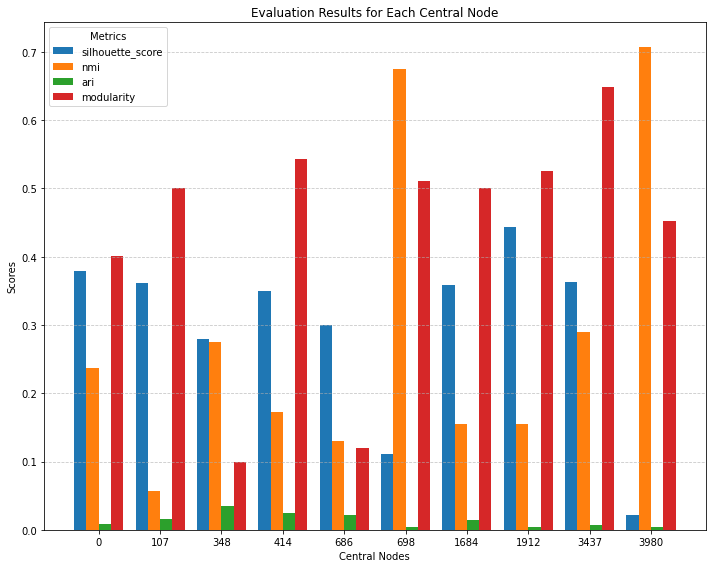

silhouette_score,nmi,ari,modularity,Central Node
0.38,0.24,0.01,0.40,0
0.36,0.06,0.02,0.50,107
0.28,0.27,0.03,0.10,348
0.35,0.17,0.03,0.54,414
0.30,0.13,0.02,0.12,686
0.11,0.68,0.00,0.51,698
0.36,0.15,0.01,0.50,1684
0.44,0.15,0.00,0.53,1912
0.36,0.29,0.01,0.65,3437
0.02,0.71,0.00,0.45,3980


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
# Extract data for visualization
central_nodes = [entry["central_node"] for entry in results]
metrics = list(results[0]["evaluation_results"].keys())
data = {metric: [entry["evaluation_results"][metric] for entry in results] for metric in metrics}

# Plotting
x = np.arange(len(central_nodes))  # X positions for central nodes
width = 0.2  # Width of bars

plt.figure(figsize=(10, 8))

# Bar chart for each metric
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, data[metric], width, label=metric)

# Customization
plt.xticks(x + width * (len(metrics) - 1) / 2, central_nodes)
plt.xlabel("Central Nodes")
plt.ylabel("Scores")
plt.title("Evaluation Results for Each Central Node")
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# Create a table for the results
table_data = {metric: data[metric] for metric in metrics}
table_data["Central Node"] = central_nodes  # Add central nodes to the table
df = pd.DataFrame(table_data)

# Style the table
styled_df = (
    df.style
    .set_caption("Evaluation Results Table")
    .background_gradient(subset=metrics, cmap="coolwarm")
    .format("{:.2f}", subset=metrics)
    .hide_index()
)

# Display the styled table
display(styled_df)

# Evaluation Results Discussion

## Discussion

The evaluation results table summarizes clustering performance across different central nodes using the following metrics: silhouette score, normalized mutual information (NMI), adjusted Rand index (ARI), and modularity. These metrics provide insights into the quality and characteristics of clustering results.

### Metrics Overview
1. **Silhouette Score**  
   - Measures the cohesion of clusters, ranging from -1 to 1 (higher is better).  
   - Scores range from **0.02 to 0.44**, indicating varying degrees of cluster quality across nodes.

2. **NMI (Normalized Mutual Information)**  
   - Quantifies the alignment between predicted and ground truth clusters (values close to 1 indicate strong correspondence).  
   - The **highest NMI** is observed for central node **3980 (0.71)**, showing strong alignment with true clustering.

3. **ARI (Adjusted Rand Index)**  
   - Evaluates the similarity between predicted and true clusters while adjusting for chance.  
   - The values are consistently close to **0**, indicating limited agreement with ground truth clustering.

4. **Modularity**  
   - Measures the strength of the division of the network into distinct communities.  
   - Scores range from **0.10 to 0.65**, with central node **3437** achieving the highest modularity, reflecting well-defined community structures.

---

## Key Findings

- **Optimal Node Performance**  
  - Central node **3980** has the highest NMI (**0.71**) but struggles with cohesion (silhouette score: **0.02**) and moderate modularity (**0.45**).

- **Community Structure**  
  - Central node **3437** achieves the highest modularity (**0.65**), indicating well-separated community structures. However, its NMI (**0.29**) and silhouette score (**0.36**) suggest only moderate clustering quality.

- **Trade-offs Between Metrics**  
  - Nodes with higher silhouette scores, such as **1912** (**0.44**), tend to exhibit lower NMI and ARI values, indicating a trade-off between cluster cohesion and alignment with true labels.

- **Sparse Clustering**  
  - Most nodes have low ARI and NMI scores, which may reflect sparse or noisy data, complicating clustering.

---

## Challenges

1. **Data Quality and Sparsity**  
   - The low ARI and NMI values suggest noisy or sparse data, which negatively affects clustering performance.

2. **Metric Trade-offs**  
   - Optimizing one metric (e.g., silhouette score) often reduces performance on others (e.g., NMI or modularity). Balancing these metrics is a challenge.

3. **Community Detection**  
   - High modularity scores do not consistently correspond to strong cluster alignment (low NMI and ARI), indicating modularity alone is insufficient for meaningful clustering.

---
